In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
ls

Hurricane_Irene_and_the_Hudson_River_do.xlsx  national_park_species.csv
README.md                                     week2discussion.ipynb
data/                                         week3_discussion.ipynb
discussion_week1.ipynb                        week4_discussion.ipynb
hur.xlsx                                      week6_discussion.ipynb
huricane.csv                                  week7_discussion.ipynb


In [9]:
# Read in the data
disaster = pd.read_csv('data/disaster.csv')

In [10]:
# Cleaning text data
def preprocess(text):
    text = text.lower() 
    text=  text.strip() # Removing leading and trailing spaces 
    text=  re.sub(r'<.*?>','', text) # Removes HTML syntax
    text = re.sub(r'[^\w\s]','',text)  # Removes punction
    text = re.sub(r'\[[0-9]*\]',' ',text) # Remove reference numbers
    text = re.sub(r'\d',' ',text)  # Remove digits
    text = re.sub(r'\s+', ' ', text) # Colasping multiple spaces into a single space so things arent double spaced
    return text

In [12]:
disaster['clean_text'] = disaster['text'].apply(preprocess)
disaster.head()

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...


What about stop words?

In [22]:
# Proff that tifidf veoctorize exclude "Stopwords" words 
# That don't hold value. We only want words that will predict 
# Our variable
stop_words = ["On March 5th, I will crush my capstone presentation with my awesome team"]

vectorizer_english = TfidfVectorizer(stop_words = "english")
X_english = vectorizer_english.fit_transform(stop_words)

print("Remaining words:")
print(vectorizer_english.get_feature_names_out())

# Stop words are like a dictionary or like a for loop?
# Laymanization 

Remaining words:
['5th' 'awesome' 'capstone' 'crush' 'march' 'presentation' 'team']


### Logistic Regression

In [28]:
# Split into test and train
X_train, X_test, y_train, y_test = train_test_split(disaster['clean_text'], disaster['target'], test_size = 0.3, random_state = 42)

In [30]:
# Vectorize words
tfidf_vectorizer = TfidfVectorizer(stop_words = "english")
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [32]:
lr_model = LogisticRegression(random_state = 42)
lr_model.fit(X_train_tfidf, y_train)
y_pred = lr_model.predict(X_test_tfidf)

Accuracy: 0.803415061295972


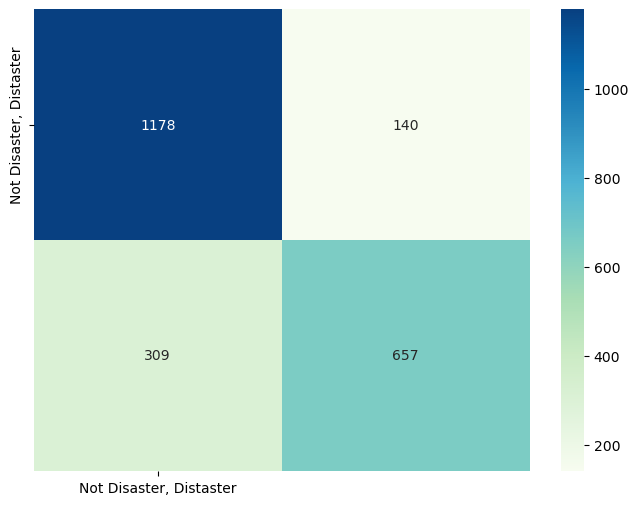

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "GnBu",
           xticklabels = ["Not Disaster, Distaster"],
            yticklabels = ["Not Disaster, Distaster"]),
plt.show()

In [38]:
new_text = [
    "BREAKING MASSIVE EARTHQUAKE HITS THE COAST",
    "I love watching disaster movies on netflix",
    "Thousands evacuated as hurrican approaches",
    "Thhiiiis iss aa disssssaster",
    "It's windy!",
    "The palisades fire has damaged over 7,000 structures",
    "I broke my tooth on a jawbreaker",
]



cleaned_new_text = [preprocess(text) for text in new_text]


new_features = tfidf_vectorizer.transform(cleaned_new_text)

predictions = lr_model.predict(new_features)

for text,pred in zip(new_text, predictions):
    print(f"Text: {text}")
    print(f"Predictions: {'Real Disaster' if pred == 1 else 'Not a real disaster'}")

Text: BREAKING MASSIVE EARTHQUAKE HITS THE COAST
Predictions: Real Disaster
Text: I love watching disaster movies on netflix
Predictions: Not a real disaster
Text: Thousands evacuated as hurrican approaches
Predictions: Real Disaster
Text: Thhiiiis iss aa disssssaster
Predictions: Not a real disaster
Text: It's windy!
Predictions: Not a real disaster
Text: The palisades fire has damaged over 7,000 structures
Predictions: Not a real disaster
Text: I broke my tooth on a jawbreaker
Predictions: Not a real disaster
